In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [19]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [20]:
shape=X.shape
print(shape)

(1000, 2)


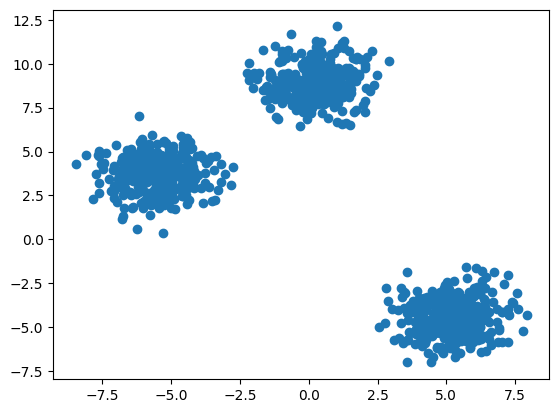

In [21]:
plt.scatter(X[:,0],X[:,1])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

from sklearn.cluster import KMeans
# kmeans=KMeans(n_clusters=3)
# kmeans.fit(X_train)

In [23]:
# Manual Process
# Elobow Method TO Select the k Value
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 992.5462587554139,
 951.0212873725302,
 786.7307217921615,
 694.2646032697405,
 643.5247242400294,
 607.8946965202026]

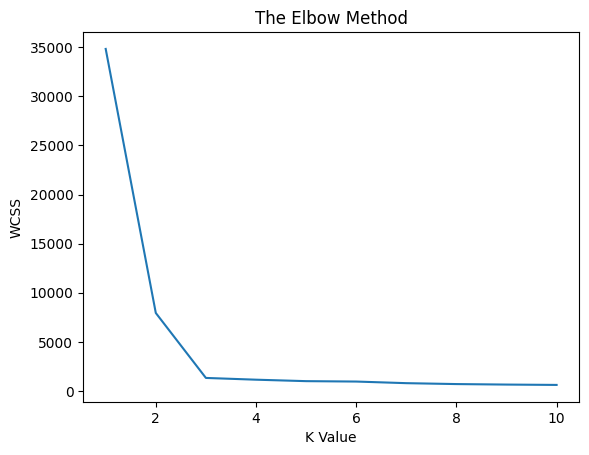

In [24]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_lables=kmeans.fit_predict(X_train)

In [26]:
y_test_lables=kmeans.predict(X_test)

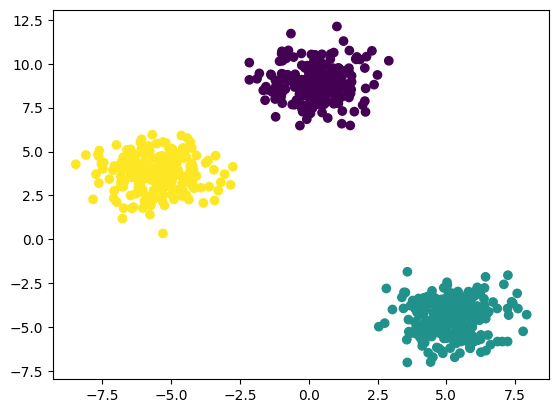

In [27]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

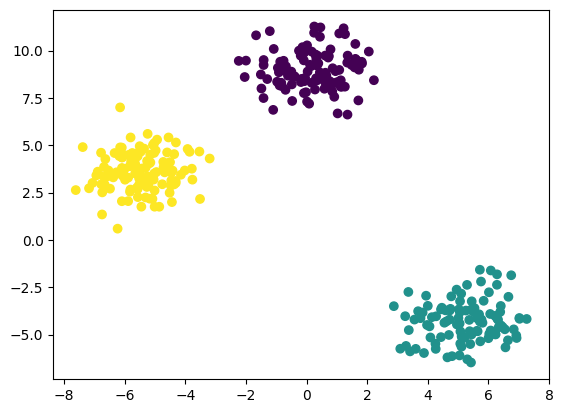

In [28]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_lables)

In [29]:
# Knee locator
# Automatacally find the k value
# %pip install kneed

In [38]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

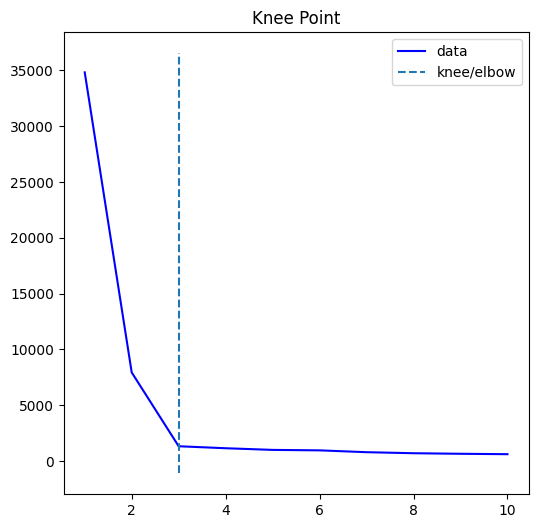

In [40]:
kl.plot_knee()

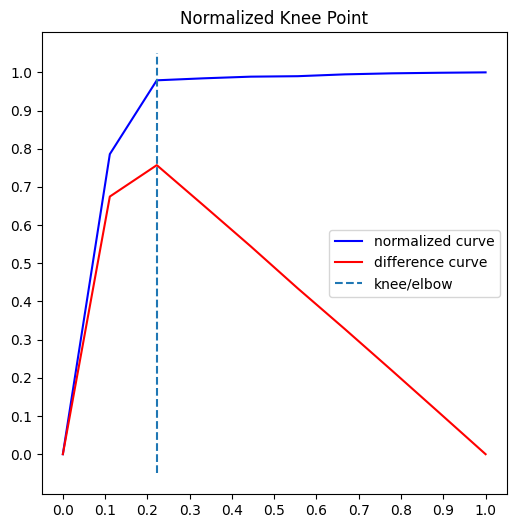

In [41]:
kl.plot_knee_normalized()

In [35]:
# Performance Metrics
# Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_cofficient=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_cofficient.append(score)

In [37]:
silhouette_cofficient

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6357733426488265),
 np.float64(0.48315998395814647),
 np.float64(0.4777277473929809),
 np.float64(0.3333122223123849),
 np.float64(0.3409614467190104),
 np.float64(0.34592723639960404),
 np.float64(0.3356549480924355)]

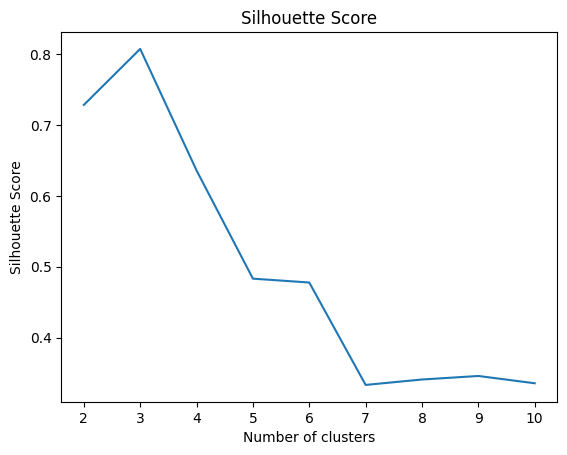

In [36]:
plt.plot(range(2,11),silhouette_cofficient)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [39]:
%pip install kneed[plot] 

Note: you may need to restart the kernel to use updated packages.
